# **CLUSTERING KONSUMSI ENERGI DI DUNIA MENGGUNAKAN DBSCAN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.optimize import curve_fit
%matplotlib inline

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataset = pd.read_csv("World_Energy_Consumption[1].csv")
df = pd.DataFrame(dataset)
df.head(918)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,NaN,Asia Pacific,2015,-0.899,-290.377,5.221,279.575,1.192,54.697,1.542,...,NaN,NaN,NaN,2.333,NaN,NaN,NaN,NaN,NaN,NaN
914,NaN,Asia Pacific,2016,-4.480,-1434.117,3.429,193.223,-4.019,-186.547,1.970,...,NaN,NaN,NaN,2.855,NaN,NaN,NaN,NaN,NaN,NaN
915,NaN,Asia Pacific,2017,2.112,645.738,4.404,256.647,-3.625,-161.524,2.975,...,NaN,NaN,NaN,3.354,NaN,NaN,NaN,NaN,NaN,NaN
916,NaN,Asia Pacific,2018,6.738,2103.993,3.876,235.863,-2.371,-101.804,3.868,...,NaN,NaN,NaN,3.767,NaN,NaN,NaN,NaN,NaN,NaN


## Proses Data Cleaning

In [ ]:
to_drop = ['gdp','iso_code','wind_energy_per_capita','wind_share_elec','wind_cons_change_pct','wind_share_energy','wind_cons_change_twh',
           'wind_elec_per_capita','gas_prod_change_pct','energy_cons_change_pct','solar_elec_per_capita','solar_energy_per_capita',
           'solar_cons_change_pct','solar_share_energy','solar_cons_change_twh','renewables_energy_per_capita','renewables_consumption',
           'renewables_cons_change_twh','biofuel_share_elec','oil_prod_change_twh','oil_prod_change_pct','biofuel_elec_per_capita','biofuel_cons_change_pct',
           'biofuel_share_energy','biofuel_cons_change_twh','other_renewable_consumption','other_renewables_energy_per_capita','per_capita_electricity',
           'renewables_elec_per_capita','renewables_share_elec','renewables_cons_change_pct','renewables_share_energy','solar_share_elec','biofuel_consumption',
           'biofuel_cons_per_capita','carbon_intensity_elec','carbon_intensity_elec','other_renewables_elec_per_capita','other_renewables_share_elec',
           'other_renewables_cons_change_pct','other_renewables_share_energy','other_renewables_cons_change_twh','oil_cons_change_pct','oil_share_energy',
           'oil_cons_change_twh','oil_elec_per_capita','oil_energy_per_capita','oil_prod_per_capita','nuclear_energy_per_capita','nuclear_elec_per_capita',
           'nuclear_consumption','nuclear_cons_change_twh','nuclear_share_energy','low_carbon_energy_per_capita','low_carbon_consumption',
           'low_carbon_cons_change_twh','nuclear_cons_change_pct','low_carbon_share_energy','low_carbon_cons_change_pct','low_carbon_elec_per_capita',
           'coal_cons_change_twh','hydro_energy_per_capita','hydro_elec_per_capita','hydro_consumption','hydro_cons_change_twh','hydro_share_energy',
           'hydro_cons_change_pct','hydro_share_elec','gas_prod_per_capita','gas_energy_per_capita','gas_elec_per_capita','low_carbon_electricity',
           'nuclear_share_elec','low_carbon_share_elec','gas_cons_change_pct','gas_share_energy','gas_cons_change_twh','fossil_cons_per_capita',
           'fossil_share_elec','fossil_energy_per_capita','fossil_cons_change_twh','fossil_share_energy','fossil_fuel_consumption',
           'fossil_cons_change_pct','energy_per_capita','energy_per_gdp','oil_share_elec','solar_electricity','wind_electricity',
           'other_renewable_exc_biofuel_electricity','other_renewable_electricity','renewables_electricity','coal_share_energy','coal_cons_change_pct',
           'gas_share_elec','hydro_electricity','nuclear_electricity','coal_cons_per_capita','fossil_electricity','coal_elec_per_capita',
           'biofuel_electricity','coal_prod_per_capita','coal_share_elec','coal_prod_change_pct','coal_prod_change_twh','gas_prod_change_twh',
           'energy_cons_change_twh','electricity_generation','population','primary_energy_consumption','coal_production','gas_production',
           'oil_production','solar_consumption','wind_consumption']
df.drop(to_drop, inplace=True, axis=1)
df.head(918)

,country,year,coal_consumption,coal_electricity,gas_electricity,oil_electricity,gas_consumption,oil_consumption
0,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
913,Asia Pacific,2015,32018.878,6268.615,1375.787,250.173,7202.076,17917.213
914,Asia Pacific,2016,31891.049,6485.893,1404.401,243.483,7375.468,18579.011
915,Asia Pacific,2017,32300.282,6854.313,1441.938,198.993,7761.256,19117.892
916,Asia Pacific,2018,33226.554,7286.146,1477.656,173.538,8310.342,19518.713


In [ ]:
df['coal_consumption'] = pd.to_numeric(df['coal_consumption'])
df['coal_electricity'] = pd.to_numeric(df['coal_electricity'])
df['gas_electricity'] = pd.to_numeric(df['gas_electricity'])
df['oil_electricity'] = pd.to_numeric(df['oil_electricity'])
df['gas_consumption'] = pd.to_numeric(df['gas_consumption'])
df['oil_consumption'] = pd.to_numeric(df['oil_consumption'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           17432 non-null  object 
 1   year              17432 non-null  int64  
 2   coal_consumption  5170 non-null   float64
 3   coal_electricity  5099 non-null   float64
 4   gas_electricity   5099 non-null   float64
 5   oil_electricity   5099 non-null   float64
 6   gas_consumption   5170 non-null   float64
 7   oil_consumption   5184 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
cdf = df[['country','year',
          'coal_consumption','coal_electricity','gas_electricity','gas_consumption','oil_electricity','oil_consumption']]
cdf.head(918)

,country,year,coal_consumption,coal_electricity,gas_electricity,gas_consumption,oil_electricity,oil_consumption
0,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
913,Asia Pacific,2015,32018.878,6268.615,1375.787,7202.076,250.173,17917.213
914,Asia Pacific,2016,31891.049,6485.893,1404.401,7375.468,243.483,18579.011
915,Asia Pacific,2017,32300.282,6854.313,1441.938,7761.256,198.993,19117.892
916,Asia Pacific,2018,33226.554,7286.146,1477.656,8310.342,173.538,19518.713


In [ ]:
from feature_engine.imputation import RandomSampleImputer
cdf.head(918)

,country,year,coal_consumption,coal_electricity,gas_electricity,gas_consumption,oil_electricity,oil_consumption
0,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
913,Asia Pacific,2015,32018.878,6268.615,1375.787,7202.076,250.173,17917.213
914,Asia Pacific,2016,31891.049,6485.893,1404.401,7375.468,243.483,18579.011
915,Asia Pacific,2017,32300.282,6854.313,1441.938,7761.256,198.993,19117.892
916,Asia Pacific,2018,33226.554,7286.146,1477.656,8310.342,173.538,19518.713


In [ ]:
imputer = RandomSampleImputer()
imputer.fit(cdf.head(918))
test_t = imputer.transform(cdf.head(918))
test_t

,country,year,coal_consumption,coal_electricity,gas_electricity,gas_consumption,oil_electricity,oil_consumption
0,Afghanistan,1900,425.647,0.000,42.826,196.640,7.204,349.895
1,Afghanistan,1901,8.651,0.000,29.380,735.637,0.310,1655.326
2,Afghanistan,1902,13338.964,0.000,0.000,298.741,0.228,1655.326
3,Afghanistan,1903,9.924,0.000,443.333,44.519,37.324,15.405
4,Afghanistan,1904,1187.141,164.786,174.819,182.683,0.820,1420.644
...,...,...,...,...,...,...,...,...
913,Asia Pacific,2015,32018.878,6268.615,1375.787,7202.076,250.173,17917.213
914,Asia Pacific,2016,31891.049,6485.893,1404.401,7375.468,243.483,18579.011
915,Asia Pacific,2017,32300.282,6854.313,1441.938,7761.256,198.993,19117.892
916,Asia Pacific,2018,33226.554,7286.146,1477.656,8310.342,173.538,19518.713


In [ ]:
test_t.describe()

,year,coal_consumption,coal_electricity,gas_electricity,gas_consumption,oil_electricity,oil_consumption
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,1967.994553,3494.476800,483.492805,139.806517,859.320477,55.340087,2759.485382
std,35.246243,7731.584023,1416.154825,320.820409,1581.662485,124.614821,4587.005030
min,1900.000000,0.221000,0.000000,0.000000,7.431000,0.000000,15.405000
25%,1938.000000,8.070000,0.000000,0.000000,152.391000,0.000000,221.925000
50%,1974.000000,14.903000,0.000000,2.700000,296.710000,0.748000,356.710000
75%,1999.000000,1184.463000,152.393500,71.327000,735.637000,34.296000,2242.792000
max,2020.000000,33949.591000,7376.391000,1482.650000,8699.249000,512.179000,19872.056000


## Proses Eksplorasi Data

In [ ]:
test_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           918 non-null    object 
 1   year              918 non-null    int64  
 2   coal_consumption  918 non-null    float64
 3   coal_electricity  918 non-null    float64
 4   gas_electricity   918 non-null    float64
 5   gas_consumption   918 non-null    float64
 6   oil_electricity   918 non-null    float64
 7   oil_consumption   918 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 57.5+ KB


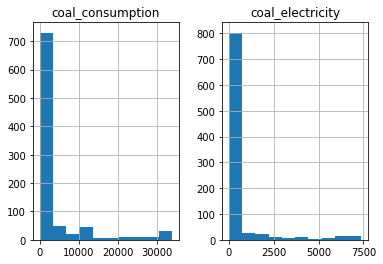

In [ ]:
viz = test_t[['coal_consumption','coal_electricity']]
viz.hist(figsize=(6,4))
plt.show()

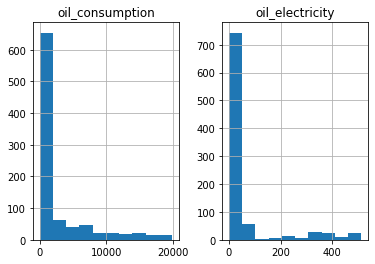

In [ ]:
viz = test_t[['oil_consumption','oil_electricity']]
viz.hist(figsize=(6,4))
plt.show()

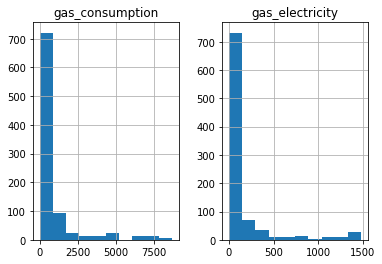

In [ ]:
viz = test_t[['gas_consumption','gas_electricity']]
viz.hist(figsize=(6,4))
plt.show()

## Data Preprocessing pada DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
x, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

x = StandardScaler().fit_transform(x)
x

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

## Clustering Data Dengan DBSCAN Algorithm

In [ ]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

Number of clusters: 2
Homogeneity: 1.0
Completeness: 0.9185311323491359
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: -0.057


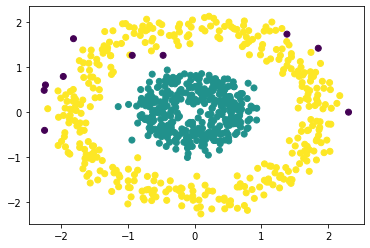

In [ ]:
x, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
x = StandardScaler().fit_transform(x)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(x)

plt.scatter(x[:,0], x[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels))
